# Complex Networks analysis
### Hugo Barbosa
hbarbosa@pas.rochester.edu

## Part 1
1. Open Source Network Analysis Tools (5 min)
 1. Desktop Applications
 2. Libraries
2. Creating graph objects (10min)
 1. Creating graphs from scratch
3. Manipulating vertices and edges Attributes(10min)
 1. Edge sequence
 2. Vertex sequence
 3. Querying vertices and edges based on attributes
4. Simple visualization (10min)
 1. Plotting
 2. Visual attributes 
 2. Visualizing edges and vertices attributes
5. Writing and reading graph files
 1. Text-based formats
 2. Graph description formats
5. Basic structural properties (10min)
  1. Vertices degrees
  2. Clustering coefficient
  3. Graph density
  4. Assortativity
6. Centrality measures (10min);
 1. Closenness
 2. Betweenness
 3. Eigenvector Centrality
 4. Pagerank
7. Degree distribution

## Part 2 (Wed - Oct 5th)
11. Exercise - Film actor network
    10. Bipartite Networks
    7. Inspecting the network structure
      2. Components
      3. Paths
      5. Spanning tree
    8. Community Analysis  

# 1. Tools
## Desktop Applications

### Cytoscape
<img src="http://www.cytoscape.org/images/screenshots/cy3_4_0_desktop.png" width=500px></img>

### Gephi
<img src="https://gephi.org/css/images/illustrations/home_screenshot.jpg" width=500px></img>

# 1. Tools
## Open source libraries

### NetworkX
Python library for creation, manipulation and analysis of complex networks;

#### Advantages:
 - It's written in pure Python and does not deppend on other libraries;
 - Wide variety of routines for network analysis and manipulation;
 - Can import from/export to different file formats;
 - Well integrated with matplotlib;
 - Smooth learning curve;
 
#### Disadvantages
 -  It's very slow compared to other libraries, especially for slightly larger graphs (e.g., +1k nodes) 
 

### igraph
Multi-platform network analysis library with emphasis on efficiency and ease of use;
#### Advantages:
 - It's written in C and is very fast;
 - Wide variety of routines for network analysis and manipulation;
 - Can import from/export to many different file formats;
 - Reasonable syntax - once you get used to it, it becomes very natural;
 - Available in C/C++, R and Python;
 
#### Disadvantages
 - It depends on the igraph C library. Installing it can be a little tricky, especially on *nix machines;
 - Plotting capabilities also depend on Cairo, a 2D graphics library;
 

### Graph-tool
A high-efficiency Python network analysis library with multiprocessing support;
#### Advantages:
 - It's heavily based on the C++ Boost Graph Library  which makes it almost as fast as pure C/C++ library.
 - Multiprocessing capabilities;
 - Vertex and edge filtering;
 - Some of the state-of-the-art algorithms for network partitioning;
 - Some interesting visualizations that are not available in other libraries;
 
#### Disadvantages
 - Installing it can be troublesome, especially if you have to build it from source;
 - Its syntax can be cryptic;
  

## Performance comparison - igraph x NetworkX 

In [2]:
import networkx as nx
import igraph as ig

In [3]:
gnx = nx.barabasi_albert_graph(1000,2)
gig = ig.Graph.Barabasi(1000,2)

In [4]:
%timeit nx.betweenness_centrality(gnx)

1 loop, best of 3: 5.68 s per loop


In [5]:
%timeit gig.betweenness()

10 loops, best of 3: 73.9 ms per loop


## Summary

|    |  Friendliness      |  Speed |
|----------|:-------------:|:------:|
| NetworkX |  ★★★ | ★|
| igraph |    ★★   |   ★★ |
| Graph-tool |★| ★★★ |

# Python igraph - a primer

## Creating graphs objects
 1. Creating graphs from scratch
 2. Writing and reading Graph files
 3. Graph generators
 4. igraph Nexus

In [6]:
#For nice inline plots with Jupyter
%matplotlib inline 

## Let's create a small social network of five students
#### We start from an empty graph
If we don't specify we want a directed graph, it will be an *undirected* graph by default 

In [7]:
g = ig.Graph(directed=True)
print g

IGRAPH D--- 0 0 --


#### Let's add our students (vertices)

IGRAPH D--- 5 0 --


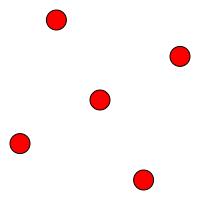

In [8]:
g.add_vertices(n=5)
print g
ig.plot(g,bbox=(0,0,200,200))

#### Now let's create their relationships (edges)
Notice that vertices IDs start from 0

IGRAPH D--- 5 6 --
+ edges:
0->1 0->2 0->3 1->2 2->3 2->4


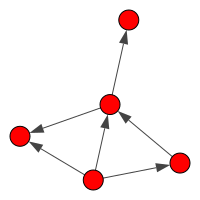

In [9]:
g.add_edges([  (0,1),  (0,2),   (0,3),    (1,2),   (2,3),     (2,4)   ])
print g
ig.plot(g,bbox=(0,0,200,200))

#### Removing vertices or edges

IGRAPH D--- 4 5 --
+ edges:
0->1 0->2 0->3 1->2 2->3


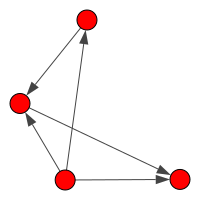

In [10]:
g.delete_vertices(4)
print g
ig.plot(g,bbox=(0,0,200,200))

IGRAPH D--- 4 4 --
+ edges:
0->1 0->2 0->3 1->2


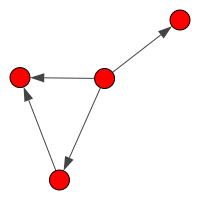

In [11]:
g.delete_edges((2,3))
print g
ig.plot(g,bbox=(0,0,200,200))

# Vertex and Edge sequences
Graph objects in igraph have two special attributes:
- `g.vs`: Vertices sequence
- `g.es`: Edges sequence

In [12]:
print list(g.vs)

[igraph.Vertex(<igraph.Graph object at 0x1093c2ce8>,0,{}), igraph.Vertex(<igraph.Graph object at 0x1093c2ce8>,1,{}), igraph.Vertex(<igraph.Graph object at 0x1093c2ce8>,2,{}), igraph.Vertex(<igraph.Graph object at 0x1093c2ce8>,3,{})]


In [13]:
print list(g.es)

[igraph.Edge(<igraph.Graph object at 0x1093c2ce8>, 0, {}), igraph.Edge(<igraph.Graph object at 0x1093c2ce8>, 1, {}), igraph.Edge(<igraph.Graph object at 0x1093c2ce8>, 2, {}), igraph.Edge(<igraph.Graph object at 0x1093c2ce8>, 3, {})]


#### We can access a particular vertex/edge like this
A particular vertex/edge can be accessed similarly to a list;

In [14]:
print g.vs[2] #Third vertex
print g.es[0] #First edge

igraph.Vertex(<igraph.Graph object at 0x1093c2ce8>,2,{})
igraph.Edge(<igraph.Graph object at 0x1093c2ce8>, 0, {})


## Vertices and Edges attributes
### Vertex and Edge sequences are also the entry point for attributes manipulation.
You can assign names to your vertices creating a vertex attribute `name`

### Now, our social network has four friends
Let's name them

['Alice', 'Bob', 'Carol', 'Dan']


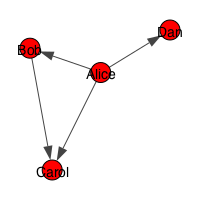

In [15]:
g.vs['name'] = ["Alice","Bob","Carol","Dan"]
print g.vs['name']
ig.plot(g,bbox=(0,0,200,200),
        vertex_label=g.vs['name'],margin=30)

### We can also assign values to individual nodes

In [16]:
g.vs[2]['name'] =  "Daniel"
g.vs[3]['name'] = "Charlie"

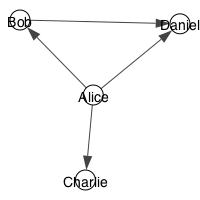

In [17]:
ig.plot(g,bbox=(0,0,200,200),
        vertex_color='#ffffff',
        vertex_label=g.vs['name'])

### Attributes can be virtually any Python object
For portability reasons, you should use only strings and numeric values (integers and floats)

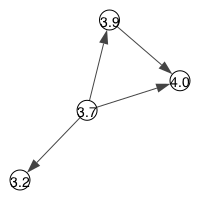

In [18]:
g.vs['gpa'] = [3.7,3.9,4.0,3.2] #floats
ig.plot(g,bbox=(0,0,200,200),
        vertex_label=g.vs['gpa'],
        vertex_color='white',
       )

In [19]:
print g

IGRAPH DN-- 4 4 --
+ attr: gpa (v), name (v)
+ edges (vertex names):
Alice->Bob, Alice->Daniel, Alice->Charlie, Bob->Daniel


### Edges can also have attributes

In [20]:
g.es['ntexts'] = [1,2,2,3]

In [21]:
g.es.select()

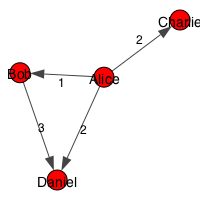

In [22]:
ig.plot(g,bbox=(0,0,200,200),
        vertex_label=g.vs['name'],
        edge_label=g.es['ntexts'])

## Querying edges and vertices
We can select edges and vertices based on attribute values.
- To *select* all edges/vertices we use the `select` method of an EdgeSeq/VertexSeq object
- We can then call the `subgraph` method to get the subgraph corresponding to our selection.

Selecting **all**  edges whose weight is greater than 1.0

In [23]:
strong_edges = g.es.select(ntexts_gt = 1)
close_friends = strong_edges.subgraph()

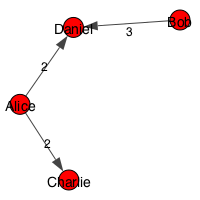

In [24]:
ig.plot(close_friends,
        vertex_label=close_friends.vs['name'],
        edge_label = close_friends.es['ntexts'],
        bbox=(0,0,200,200))

Selecting **all** vertices whose gpa is greater or equal than 3.5

In [25]:
good_students = g.vs.select(gpa_ge = 3.5)
good_students_network = good_students.subgraph()

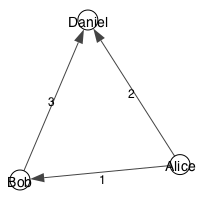

In [26]:
ig.plot(good_students_network,
        vertex_label=good_students_network.vs['name'],
        edge_label = good_students_network.es['ntexts'],
        vertex_color='white',
        bbox=(0,0,200,200))

# Simple network visualizations with igraph
For better visualizations we need two pieces
 - Plot aesthetics (e.g., colors, sizes etc.)


In [28]:
layout = ig.Layout( [(0,0),(0,1),(0,2),(1,2)])

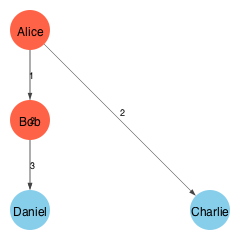

In [29]:
ig.plot(g,
        layout = layout,
        vertex_label=g.vs['name'],
        vertex_color = ['tomato','tomato','sky blue','sky blue'],
        vertex_size = 40,
        vertex_label_size = 12,
        vertex_frame_width=0,
        
        edge_width=0.5,
        edge_arrow_size = 0.5,
        edge_label = g.es['ntexts'],
        edge_label_size=9,
        margin=30,
        bbox=(0,0,240,240)
       )

## Graph drawing 
Sometimes we want to visualize vertices or edges attributes.

igraph allows us to easily change many visual aspects. 
The most common are:

 - Vertices
  - size: `vertex_size`
  - color: `vertex_color`
  - label: `vertex_label`
  - label size: `vertex_label_size`
  - frame width: `vertex_frame_width`
  
 - Edges
  - width: `edge_width`
  - color: `edge_color`
  - arrow size: `edge_arrow_size`

## Rescaling an attribute
igraph provides a simple `rescale` function such that you can easily adjust your visual properties according to a particular attribute within a given range.

In [30]:
ig.rescale([2, 3, 20, 10],out_range=(8,15))

[8.0, 8.38888888888889, 15.0, 11.11111111111111]

### Resizing vertices according to their betweenness centralities
Let's take a look at the largest component of the Network Science collaboration network

In [31]:
net = ig.Nexus.get('netscience')
net_components = net.components()
net_giant_component = net_components.giant()

In [32]:
vertices_label_sizes = ig.rescale(net_giant_component.betweenness(weights=net_giant_component.es['weight']),out_range=(4,18))
vertices_sizes = ig.rescale(net_giant_component.betweenness(weights=net_giant_component.es['weight']),
                            out_range=(2,30))

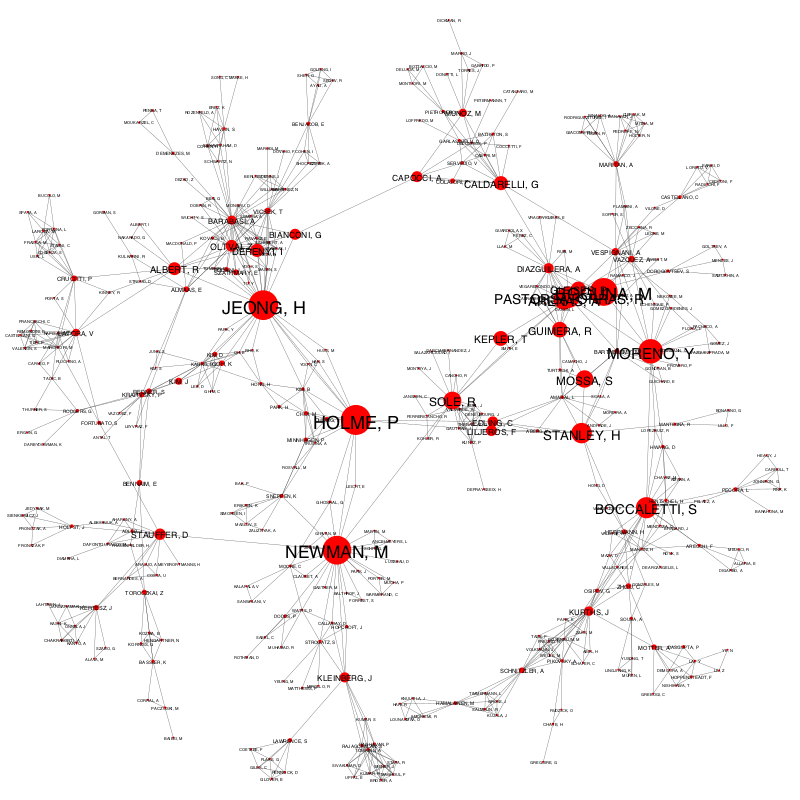

In [33]:
ig.plot(net_giant_component,
        vertex_label=net_giant_component.vs['name'],
        vertex_frame_width=0,
        edge_width=0.3,
        vertex_label_size=vertices_label_sizes,
        vertex_size=vertices_sizes,
        bbox=(0,0,800,800)
       )

### Specifying colors in igraph
- X11 color names: https://en.wikipedia.org/wiki/X11_color_names
- CSS syntax:
 - #RRGGBB: from 0 to 255 in hexadecimal format. Example: "#ff0099"
 - #RGB: from 0 to 15 in hexadecimal format: Example: "#f09"
 - rgb(R,G,B): Example: "rgb(255,0,0)"
 - rgba(R,G,B,A): A is the alpha channel (transparency). Example: "rgba(255,0,0,0.5)"

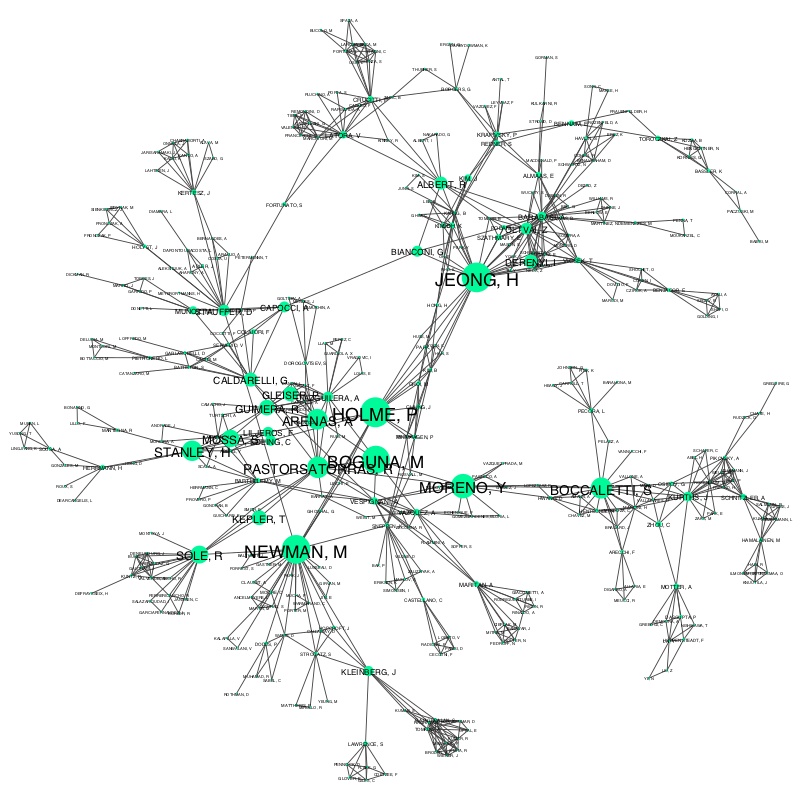

In [34]:
ig.plot(net_giant_component,
        vertex_label=net_giant_component.vs['name'],
        vertex_color='medium spring green',
        vertex_frame_width=0,
        edge_width=0.9,
        vertex_label_size=vertices_label_sizes,
        vertex_size=vertices_sizes,
        bbox=(0,0,800,800)
       )

# Reading and writing graph files
igraph provides functions to read and write the most common network file formats

## Text files
#### NCOL (Labeled edgelist)
```
vertex1name vertex2name [optionalWeight]
vertex1name vertex3name [optionalWeight]
```

#### LGL (Adjacency list)
```
# vertex1name
vertex2name [optionalWeight]
vertex3name [optionalWeight]
```
 
#### Adjacency matrix
```
0 1 1 
1 0 0
1 0 0 
```
#### Edge list
```
0 1
0 2
```

## Writing graph files

In [35]:
g.write('network1.ncol',format='ncol',weights='ntexts')
g.write('network1.lgl',format='lgl',weights='ntexts')
g.write('network1_adjacency_matrix.txt',format='adjacency')
g.write('network1_edge_list.txt',format='edges')


In [36]:
tmp = ig.read('network1.ncol')
print tmp

IGRAPH DNW- 4 4 --
+ attr: name (v), weight (e)
+ edges (vertex names):
Alice->Bob, Alice->Daniel, Alice->Charlie, Bob->Daniel


In [37]:
tmp = ig.read('network1.lgl',directed=True)
print tmp

IGRAPH DNW- 4 4 --
+ attr: name (v), weight (e)
+ edges (vertex names):
Alice->Bob, Alice->Daniel, Alice->Charlie, Bob->Daniel


In [38]:
tmp = ig.read('network1_adjacency_matrix.txt',format='adjacency')
print tmp

IGRAPH D--- 4 4 --
+ edges:
0->1 0->2 0->3 1->2


In [39]:
tmp = ig.read('network1_edge_list.txt',format='edges')
print tmp

IGRAPH D--- 4 4 --
+ edges:
0->1 0->2 0->3 1->2


# Reading and writing graph files

### Graph description formats 
These formats are more powerful and robust. They allow you to store not only structure but also attributes.
 
 - GML (Graph Modeling Language)
 - GraphML

### Writing the graph files

In [40]:
g.write('network1.gml',format='gml')
g.write('network1.graphml',format='graphml')


### Reading the graph files

In [41]:
tmp = ig.read('network1.gml')
print tmp

IGRAPH DN-- 4 4 --
+ attr: color (v), gpa (v), id (v), name (v), ntexts (e)
+ edges (vertex names):
Alice->Bob, Alice->Daniel, Alice->Charlie, Bob->Daniel


In [42]:
tmp = ig.read('network1.graphml')
print tmp

IGRAPH DN-- 4 4 --
+ attr: color (v), gpa (v), id (v), name (v), ntexts (e)
+ edges (vertex names):
Alice->Bob, Alice->Daniel, Alice->Charlie, Bob->Daniel


# Structural properties
  1. Degrees
  2. Clustering coefficient
  3. Graph density
  4. Assortativity

## Degrees of the vertices

In [43]:
d = g.degree() #degree
d_in = g.degree(mode='in') #in-degree
d_out = g.degree(mode='out') #out-degree

In [44]:
print d
print d_in
print d_out

[3, 2, 2, 1]
[0, 1, 2, 1]
[3, 1, 0, 0]


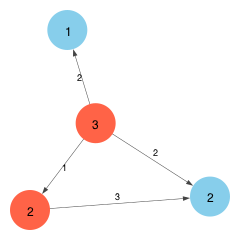

In [45]:
ig.plot(g,
        vertex_label=d, 
        vertex_color = ['tomato','tomato','sky blue','sky blue'],
        vertex_size = 40, vertex_label_size = 12, vertex_frame_width=0,edge_width=0.5,
        edge_arrow_size = 0.5,edge_label = g.es['ntexts'],edge_label_size=9, margin=30, bbox=(0,0,240,240)
       )

### Global clustering coefficient

In [46]:
g.transitivity_undirected()

0.6

### Local clustering

In [47]:
print g.transitivity_local_undirected()

[0.3333333333333333, 1.0, 1.0, nan]


### Density

In [48]:
print g.density()

0.333333333333


### Assortativity
Pearson correlation between the attributes of **source** and **target** nodes of all edges

#### Degree assortativity

In [49]:
print g.assortativity_degree()

-0.57735026919


#### GPA assortativity


In [50]:
print g.assortativity('gpa')

0.388378666802


### Let's calculate it in a different way
#### First, we build a list of source and target nodes for all edges

In [51]:
source_nodes = [edge.source for edge in g.es]
target_nodes = [edge.target for edge in g.es]
print source_nodes,target_nodes

[0, 0, 0, 1] [1, 2, 3, 2]


#### Next, we extract their corresponding GPAs

In [52]:
source_gpas = g.vs[source_nodes]['gpa']
target_gpas = g.vs[target_nodes]['gpa']
print "Sources' GPAs ",source_gpas
print "Targets' GPAs ", target_gpas

Sources' GPAs  [3.7, 3.7, 3.7, 3.9]
Targets' GPAs  [3.9, 4.0, 3.2, 4.0]


#### Now we measure their correlation

In [53]:
import numpy as np

print np.corrcoef(source_gpas,target_gpas)[0,1]

0.388378666802


# Centrality Measures

In [54]:
net = net_giant_component
closeness = net.closeness(weights=net.es['weight'])
betweenness = net.betweenness(weights=net.es['weight'])
pagerank = net.pagerank(weights=net.es['weight'])
eigen = net.eigenvector_centrality(weights=net.es['weight'])

In [55]:
layout = net.layout_auto(weights=net.es['weight'])

## Closeness

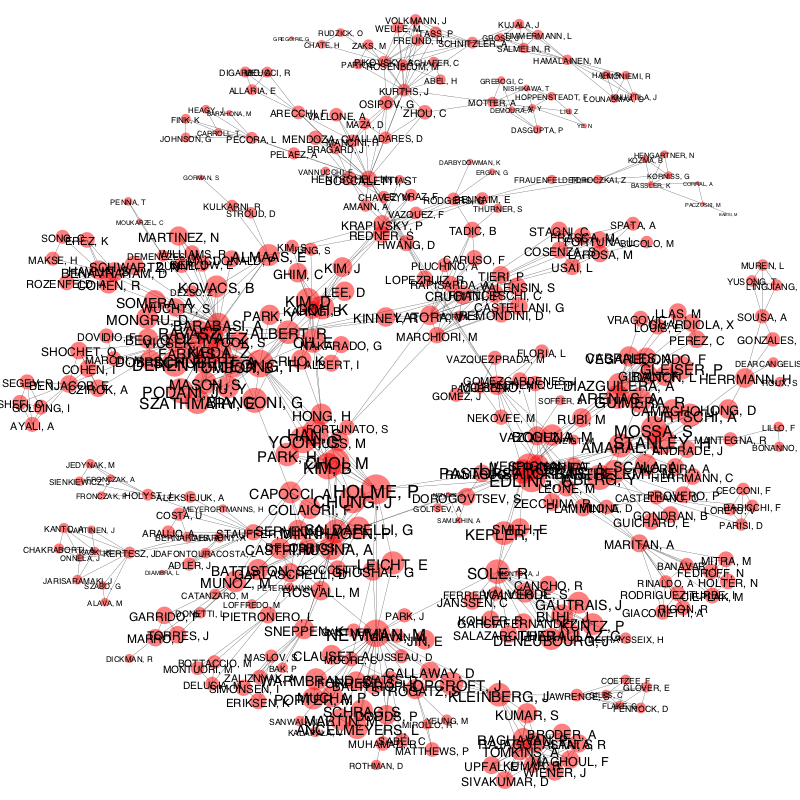

In [56]:
ig.plot(net,
        layout=layout,
        vertex_label=net.vs['name'],
        scale=10.0,
        vertex_color='rgba(255,0,0,0.5)',
        vertex_frame_width=0,
        edge_width=0.3,
        vertex_label_size=ig.rescale(closeness,out_range=(4,18)),
        vertex_size=ig.rescale(closeness,out_range=(1,30)),
        bbox=(0,0,800,800)
       )

## Betweenness

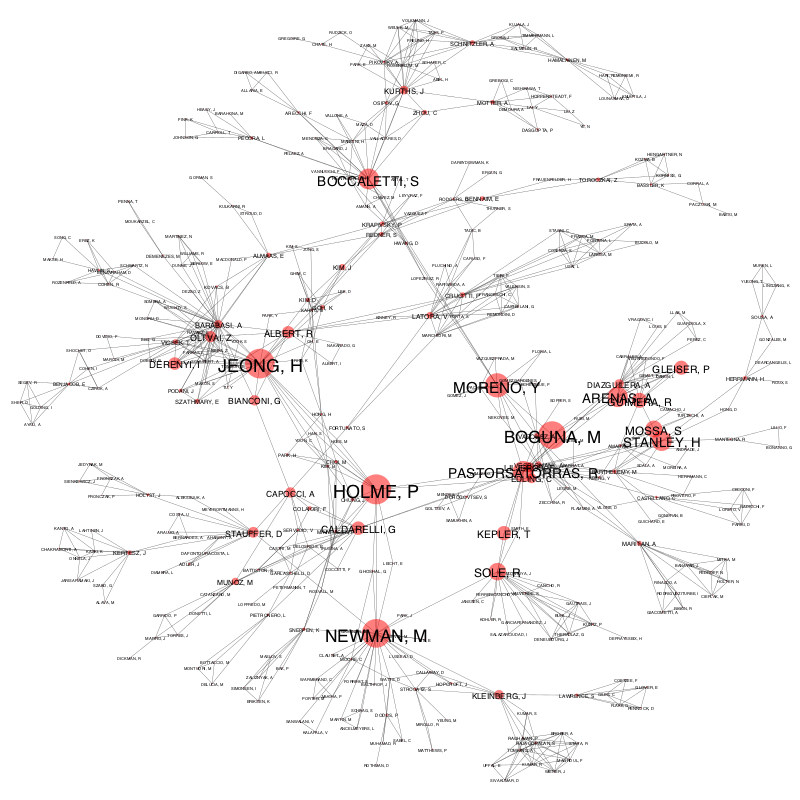

In [57]:
ig.plot(net,
        layout = layout,
        vertex_label=net.vs['name'],
        scale=10.0,
        vertex_color='rgba(255,0,0,0.5)',
        vertex_frame_width=0,
        edge_width=0.3,
        vertex_label_size=ig.rescale(betweenness,out_range=(4,18)),
        vertex_size=ig.rescale(betweenness,out_range=(1,30)),
        bbox=(0,0,800,800)
       )

## Pagerank

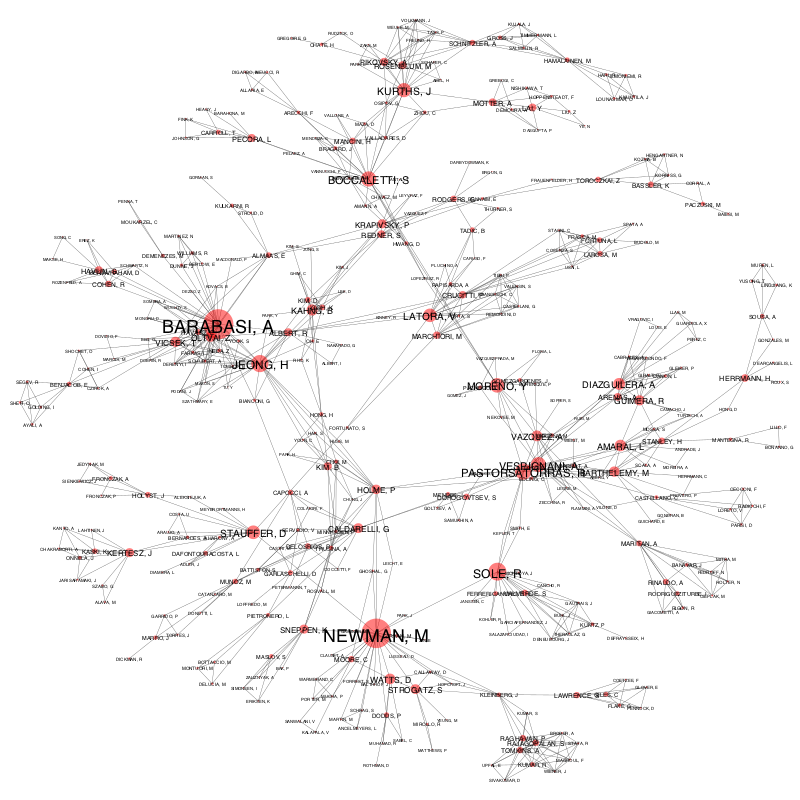

In [58]:
ig.plot(net,
        layout = layout,
        vertex_label=net.vs['name'],
        scale=10.0,
        vertex_color='rgba(255,0,0,0.5)',
        vertex_frame_width=0,
        edge_width=0.3,
        vertex_label_size=ig.rescale(pagerank,out_range=(4,18)),
        vertex_size=ig.rescale(pagerank,out_range=(1,30)),
        bbox=(0,0,800,800)
       )

## Eigenvector Centrality

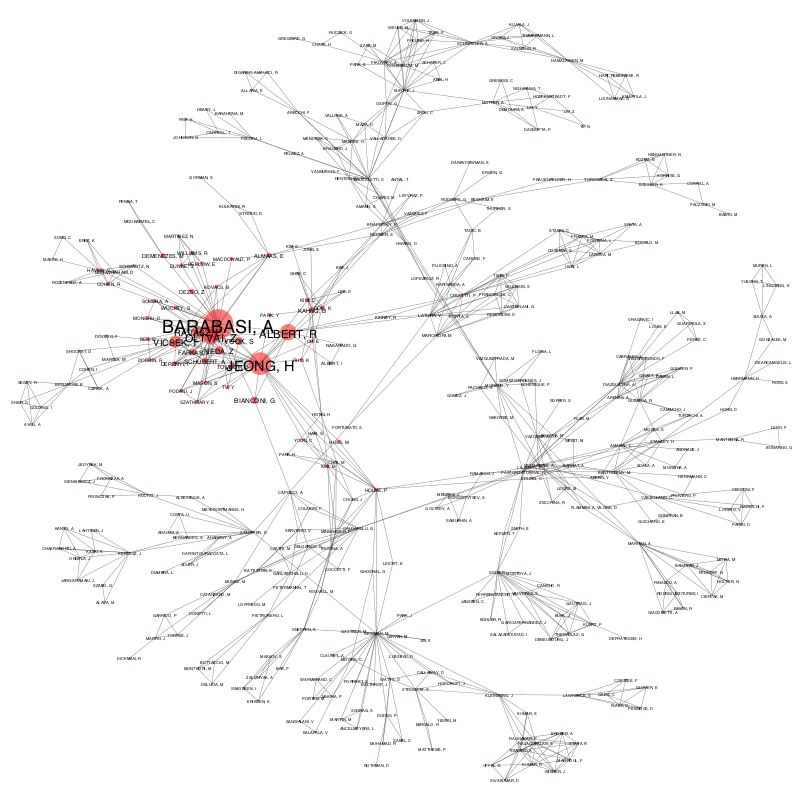

In [59]:
ig.plot(net,
        layout = layout,
        vertex_label=net.vs['name'],
        scale=10.0,
        vertex_color='rgba(255,0,0,0.5)',
        vertex_frame_width=0,
        edge_width=0.3,
        vertex_label_size=ig.rescale(eigen,out_range=(4,18)),
        vertex_size=ig.rescale(eigen,out_range=(2,30)),
        bbox=(0,0,800,800)
       )

# Degree distribution


Let's analyze the degree distribution of the Internet routers' network

In [60]:
g = ig.Nexus.get('as2006')
print g.summary()

IGRAPH U--- 22963 48436 -- Internet at the AS level, July 22, 2006
+ attr: Author (g), Description (g), URL (g), name (g), id (v)


In [63]:
d = g.degree()

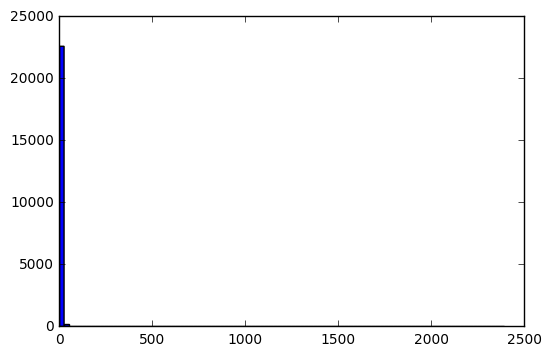

In [65]:
import matplotlib.pyplot as plt
plt.hist(d,bins=100);

Instead of the histogram, maybe the PDF can be more helpful.

In [66]:
import numpy as np
pk,k = np.histogram(d,bins=np.unique(d),density=True)
k = k[:-1]

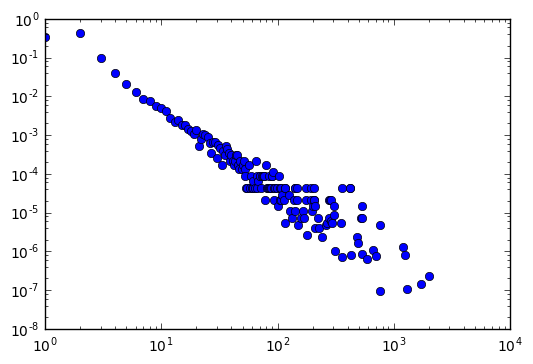

In [67]:
plt.plot(k,pk,marker='o',linestyle='none')
plt.xscale('log')
plt.yscale('log')


### Let's try to reduce the noise in the tail by using a logarithmic binning
For such, we need logarithmically spaced bins 

In [68]:
import numpy as np
pk,k = np.histogram(d,bins=np.unique(np.floor(np.logspace(0,3,50))),density=True)
k = k[:-1]

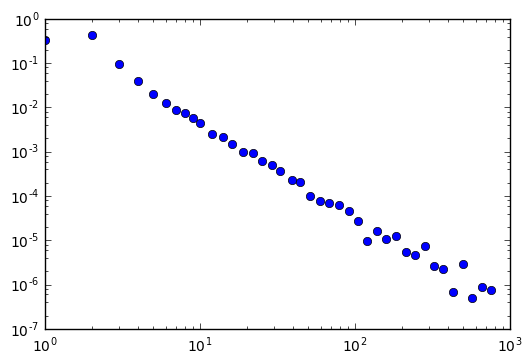

In [69]:
plt.plot(k,pk,marker='o',linestyle='none')
plt.xscale('log')
plt.yscale('log')


## Now, using  the powerlaw library.

In [70]:
import powerlaw as pl

/Users/hugoserrano/Library/Python/2.7/lib/python/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


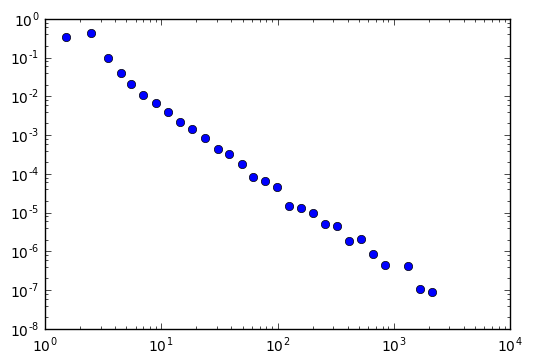

In [71]:
pl.plot_pdf(d,marker='o',linestyle='none')

#### What about the Complementary Cumulative Distribution Function (CCDF)?
Instead of showing the $p(k)$, we show the probability of finding a node with degree greater than $k$

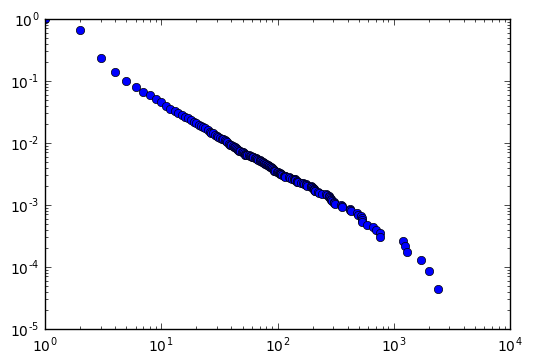

In [72]:
pl.plot_ccdf(d,marker='o',linestyle='none')

## Distribution fit

In [73]:
degree_fit = pl.Fit(d,discrete=True)

Calculating best minimal value for power law fit
/Library/Python/2.7/site-packages/powerlaw.py:692: RuntimeWarning: invalid value encountered in divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Library/Python/2.7/site-packages/powerlaw.py:692: RuntimeWarning: divide by zero encountered in divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


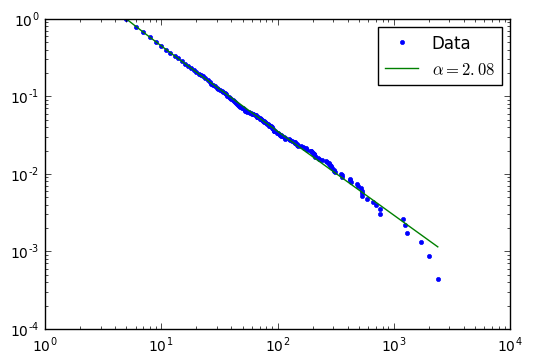

In [74]:
ax = degree_fit.plot_ccdf(label='Data',marker='.',linestyle='none')
degree_fit.power_law.plot_ccdf(ax = ax,label=r'$\alpha = %.2f$'%degree_fit.alpha)
plt.legend(numpoints=1)

In [75]:
print degree_fit.distribution_compare('power_law','exponential')
print degree_fit.distribution_compare('power_law','lognormal')
print degree_fit.distribution_compare('power_law','stretched_exponential')
print degree_fit.distribution_compare('power_law','truncated_power_law')

(1635.6583361107141, 3.017657672456095e-18)
(-0.15148338296274488, 0.67943889781859934)
(10.927620998537343, 0.026023349308354315)


Assuming nested distributions


(-0.74048480269885175, 0.22362288015030851)


(0.0001, 1.0)

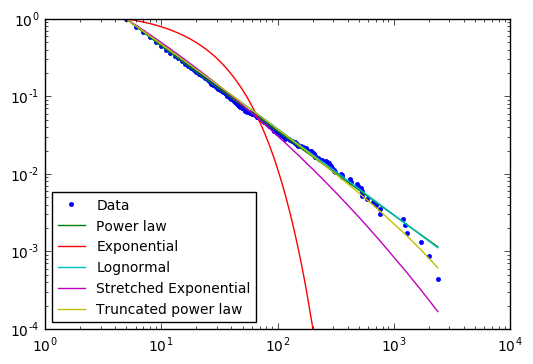

In [76]:
ax = degree_fit.plot_ccdf(label='Data',marker='.',linestyle='none')
degree_fit.power_law.plot_ccdf(ax = ax,label=r'Power law'%degree_fit.alpha)
degree_fit.exponential.plot_ccdf(ax = ax,label=r'Exponential'%degree_fit.alpha)
degree_fit.lognormal.plot_ccdf(ax = ax,label=r'Lognormal'%degree_fit.alpha)
degree_fit.stretched_exponential.plot_ccdf(ax = ax,label=r'Stretched Exponential'%degree_fit.alpha)
degree_fit.truncated_power_law.plot_ccdf(ax = ax,label=r'Truncated power law'%degree_fit.alpha)
plt.legend(numpoints=1,loc='best',fontsize=10)
plt.ylim(1e-4,1e0)